### Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import statsmodels
import matplotlib.pyplot as plt
import math

### Reading and inspecting csv file

In [2]:
## Read in Data
flight = pd.read_csv("flight.csv")
flight.head()

,miles,passengers,delay,inflight_meal,inflight_entertainment,inflight_wifi,day_of_week,redeye,weekend,coach_price,firstclass_price,hours
0,792,172,0,No,Yes,Yes,Sunday,Yes,Yes,338.820,1571.02,1
1,3163,214,0,No,Yes,Yes,Sunday,No,Yes,472.655,1663.70,6
2,1832,212,0,No,Yes,No,Friday,No,Yes,351.960,1429.86,3
3,925,213,0,No,Yes,Yes,Saturday,No,Yes,387.835,1558.76,2
4,967,217,0,Yes,Yes,Yes,Monday,No,No,374.735,1245.58,2


### Minimum coach ticket price

In [3]:
## Task 1
min_price = np.min(flight.coach_price)
min_price

44.415

### Maximum coach ticket price

In [4]:
max_price = flight.coach_price.max()
max_price

593.635

### Average coach ticket price

In [5]:
average = flight.coach_price.mean()
average

376.5852530821279

### Median coach ticket price

In [6]:
median = np.median(flight.coach_price)
median

380.56

### Histogram of Coach Ticket Price

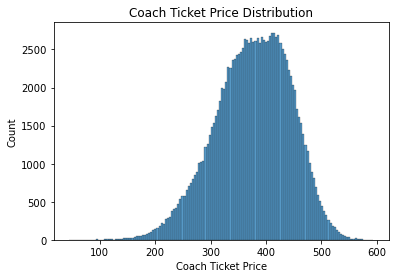

<Figure size 432x288 with 0 Axes>

In [7]:
sns.histplot(data = flight.coach_price)
plt.xlabel('Coach Ticket Price')
plt.ylabel('Count')
plt.title('Coach Ticket Price Distribution')
plt.show()
plt.clf()

### Boxplot of Coach Ticket Price

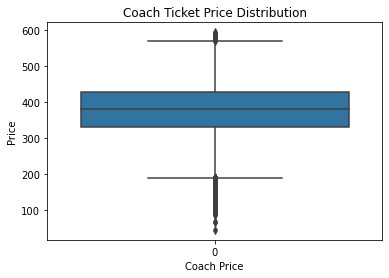

<Figure size 432x288 with 0 Axes>

In [8]:
sns.boxplot(data = flight.coach_price)
plt.xlabel('Coach Price')
plt.title('Coach Ticket Price Distribution')
plt.ylabel('Price')
plt.show()
plt.clf()

### Filtering flight dataframe for 8 hour flights

In [9]:
## Task 2
eight_hr_flights = flight[flight.hours == 8]
eight_hr_flights.head()

,miles,passengers,delay,inflight_meal,inflight_entertainment,inflight_wifi,day_of_week,redeye,weekend,coach_price,firstclass_price,hours
75,4182,209,0,Yes,Yes,Yes,Wednesday,No,No,416.320,1441.36,8
81,4158,213,0,No,Yes,Yes,Saturday,No,Yes,474.350,1712.92,8
111,4269,217,0,No,No,Yes,Sunday,No,Yes,407.125,1614.34,8
290,4239,221,0,No,Yes,Yes,Saturday,No,Yes,432.905,1678.51,8
295,4131,230,0,No,No,Yes,Friday,No,Yes,406.565,1591.73,8


### Mean coach ticket price for 8 hour flights

In [10]:
mean_8 = np.mean(eight_hr_flights.coach_price)
mean_8

431.8343773728164

### Median coach ticket price for 8 hour flights

In [11]:
median_8 = eight_hr_flights.coach_price.median()
median_8

437.115

### Minimum coach ticket price for 8 hour flights

In [12]:
min_8 = np.min(eight_hr_flights.coach_price)
min_8

170.77

### Maximum coach ticket price for 8 hour flights

In [13]:
max_8 = np.max(eight_hr_flights.coach_price)
max_8

593.635

### Boxplot of Coach Ticket Price for 8 hour flights

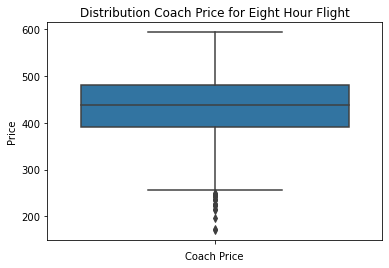

<Figure size 432x288 with 0 Axes>

In [14]:
sns.boxplot(data = eight_hr_flights, y = 'coach_price')
plt.title('Distribution Coach Price for Eight Hour Flight')
plt.xlabel('Coach Price')
plt.ylabel('Price')
plt.show()
plt.clf()

### Histogram of Coach Ticket Price for 8 hour flights

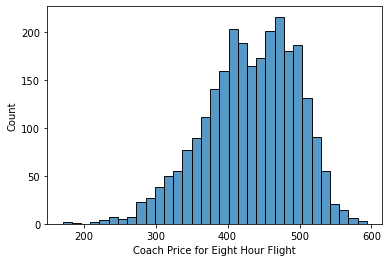

<Figure size 432x288 with 0 Axes>

In [15]:
sns.histplot(eight_hr_flights.coach_price)
plt.xlabel('Coach Price for Eight Hour Flight')
plt.ylabel('Count')
plt.show()
plt.clf()

### Distribution of delay periods less than 50 minutes

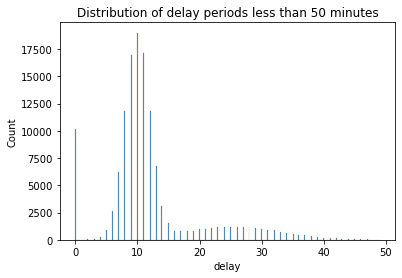

<Figure size 432x288 with 0 Axes>

In [16]:
## Task 3
hundred_mins_delay = flight[flight.delay < 50]
sns.histplot(data = hundred_mins_delay, x = 'delay')
plt.title('Distribution of delay periods less than 50 minutes')
plt.show()
plt.clf()


### Relationship between coach and first-class prices

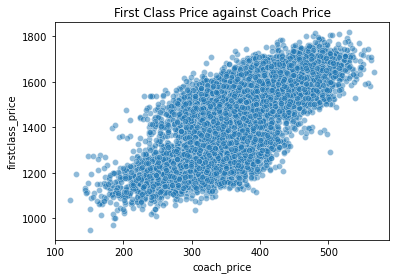

<Figure size 432x288 with 0 Axes>

In [17]:
## Task 4
# Using scatter plot to analyse relationship between coach and first class prices
perch = 0.1
flight_sub = flight.sample(n = int(flight.shape[0] * perch))
sns.scatterplot(data = flight_sub, x = 'coach_price', y = 'firstclass_price', alpha = 0.5)
plt.title('First Class Price against Coach Price')
plt.show()
plt.clf()

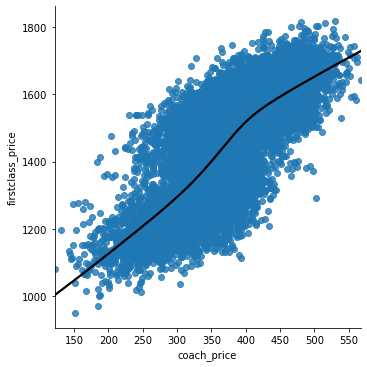

<Figure size 432x288 with 0 Axes>

In [18]:
# Using lmplot to analyse relationship between coach and first class prices
sns.lmplot(data = flight_sub, x = 'coach_price', y = 'firstclass_price', line_kws = {'color':'black'}, lowess = True)
plt.show()
plt.clf()

### Relationship between coach prices and inflight features— inflight meal, inflight entertainment, and inflight WiFi

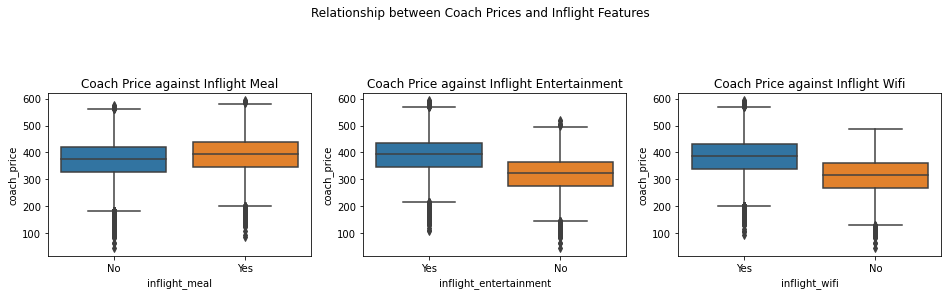

<Figure size 432x288 with 0 Axes>

In [19]:
## Task 5
# Analyzing Relationship between Coach Prices and Inflight Features using Boxplot
f = plt.figure(figsize = (16, 12))
ax = plt.subplot(3, 3, 1)
sns.boxplot(data = flight, x = 'inflight_meal', y = 'coach_price')
plt.title('Coach Price against Inflight Meal')
ax1 = plt.subplot(3, 3, 2)
sns.boxplot(data = flight, x = 'inflight_entertainment', y = 'coach_price')
plt.title('Coach Price against Inflight Entertainment')
ax2 = plt.subplot(3, 3, 3)
sns.boxplot(data = flight, x = 'inflight_wifi', y = 'coach_price')
plt.title('Coach Price against Inflight Wifi')
plt.subplots_adjust(hspace = 0.5)
f.suptitle('Relationship between Coach Prices and Inflight Features')
plt.show()
plt.clf()

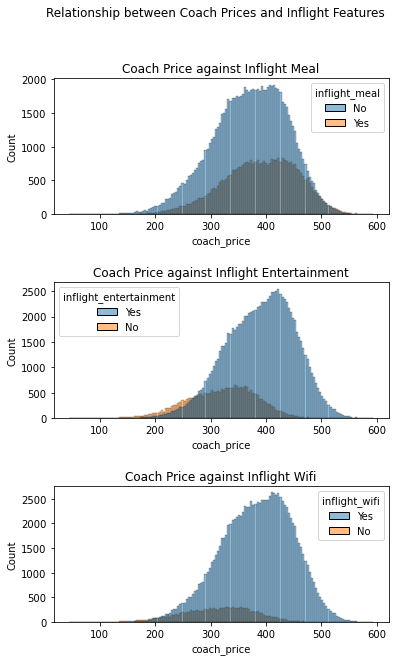

<Figure size 432x288 with 0 Axes>

In [20]:
# Analyzing Relationship between Coach Prices and Inflight Features using Histogram
f = plt.figure(figsize = (6, 10))
ax = plt.subplot(3, 1, 1)
sns.histplot(data = flight, x = 'coach_price', hue = 'inflight_meal')
plt.title('Coach Price against Inflight Meal')
ax1 = plt.subplot(3, 1, 2)
sns.histplot(data = flight, x = 'coach_price', hue = 'inflight_entertainment')
plt.title('Coach Price against Inflight Entertainment')
ax2 = plt.subplot(3, 1, 3)
sns.histplot(data = flight, x = 'coach_price', hue = 'inflight_wifi')
plt.title('Coach Price against Inflight Wifi')
plt.subplots_adjust(hspace = 0.5)
f.suptitle('Relationship between Coach Prices and Inflight Features')
plt.show()
plt.clf()

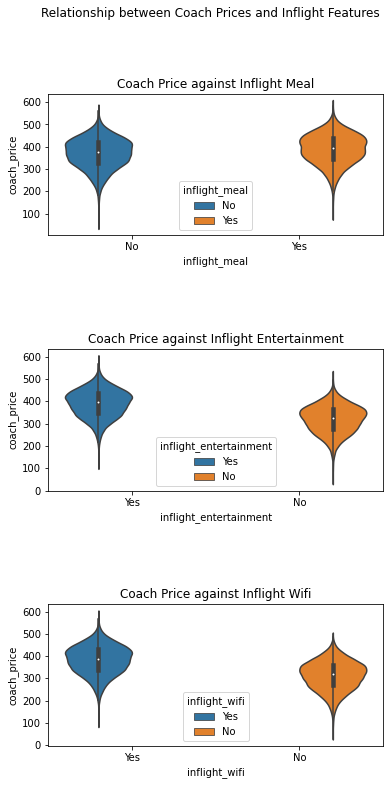

<Figure size 432x288 with 0 Axes>

In [21]:
# Analyzing Relationship between Coach Prices and Inflight Features using Violinplot
f = plt.figure(figsize = (6, 12))
ax = plt.subplot(3, 1, 1)
sns.violinplot(data = flight, y = 'coach_price', x = 'inflight_meal', hue = 'inflight_meal')
plt.title('Coach Price against Inflight Meal')
ax1 = plt.subplot(3, 1, 2)
sns.violinplot(data = flight, y = 'coach_price', x = 'inflight_entertainment', hue = 'inflight_entertainment')
plt.title('Coach Price against Inflight Entertainment')
ax2 = plt.subplot(3, 1, 3)
sns.violinplot(data = flight, y = 'coach_price', x = 'inflight_wifi', hue = 'inflight_wifi')
plt.title('Coach Price against Inflight Wifi')
plt.subplots_adjust(hspace = 0.8)
f.suptitle('Relationship between Coach Prices and Inflight Features')
plt.show()
plt.clf()

### Number of passengers in relation to flight length

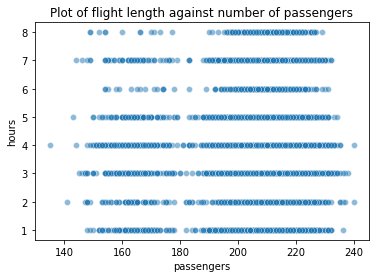

<Figure size 432x288 with 0 Axes>

In [22]:
## Task 6
# Analyzing number of passengers in relation to flight length using scatterplot
sns.scatterplot(data = flight_sub, x = 'passengers', y = 'hours', alpha = 0.5)
plt.title('Plot of flight length against number of passengers')
plt.show()
plt.clf()

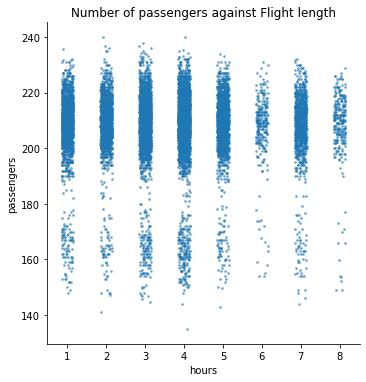

<Figure size 432x288 with 0 Axes>

In [23]:
# Analyzing number of passengers in relation to flight length using lmplot
sns.lmplot(data = flight_sub, x = 'hours', y = 'passengers', x_jitter = 0.15, y_jitter = 0.15, fit_reg = False, scatter_kws = {'s':3, 'alpha':0.5})
plt.title('Number of passengers against Flight length')
plt.show()
plt.clf()


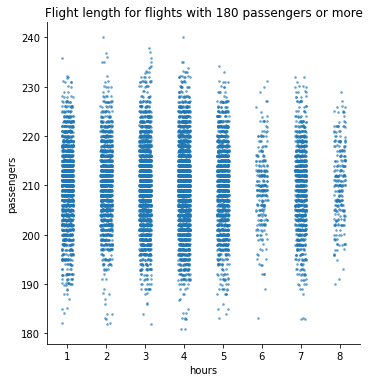

<Figure size 432x288 with 0 Axes>

In [24]:
# Analyzing flight length for flights with 180 passengers or more 
above_180 = flight_sub[flight_sub.passengers > 180]
sns.lmplot(data = above_180, x = 'hours', y = 'passengers', x_jitter = 0.15, y_jitter = 0.15, fit_reg = False, scatter_kws = {'s':3, 'alpha':0.5})
plt.title('Flight length for flights with 180 passengers or more')
plt.show()
plt.clf()

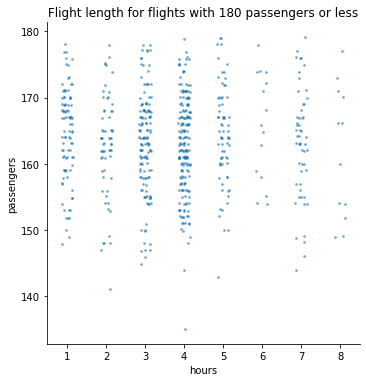

<Figure size 432x288 with 0 Axes>

In [25]:
# Analyzing flight length for flights with 180 passengers or less
below_180 = flight_sub[flight_sub.passengers < 180]
sns.lmplot(data = below_180, x = 'hours', y = 'passengers', x_jitter = 0.15, y_jitter = 0.15, fit_reg = False, scatter_kws = {'s':3, 'alpha':0.5})
plt.title('Flight length for flights with 180 passengers or less')
plt.show()
plt.clf()

### Relationship between coach and first-class prices on weekends compared to weekdays

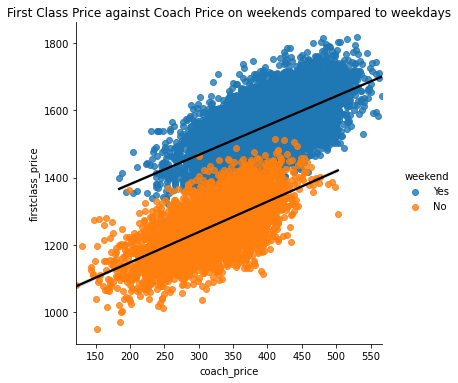

<Figure size 432x288 with 0 Axes>

In [26]:
## Task 7
sns.lmplot(data = flight_sub, x = 'coach_price', y = 'firstclass_price', hue = 'weekend', fit_reg = True, line_kws = {'color':'black'})
plt.title('First Class Price against Coach Price on weekends compared to weekdays')
plt.show()
plt.clf()


### Coach Prices variations for Redeyes and Non-Redeyes on each day of the week

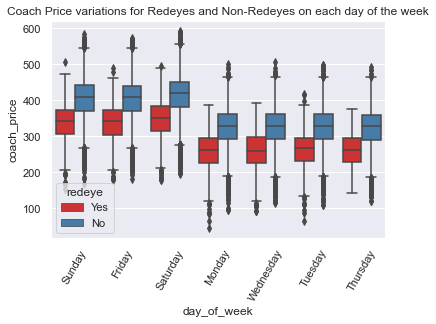

<Figure size 432x288 with 0 Axes>

In [27]:
## Task 8
# Analyzing coach price variations for Redeyes and Non-Redeyes on each day of the week using Boxplot
sns.set_palette('Set1')
sns.set_style('darkgrid')
sns.set_context('notebook')
sns.boxplot(data = flight, x = 'day_of_week', y = 'coach_price', hue = 'redeye')
plt.title('Coach Price variations for Redeyes and Non-Redeyes on each day of the week')
plt.xticks(rotation = 60)
plt.show()
plt.clf()


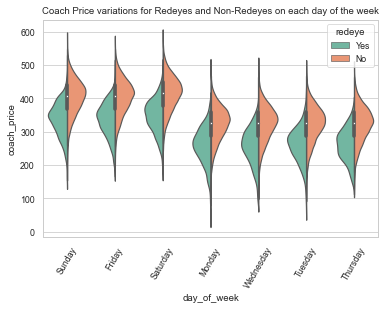

In [28]:
# Analyzing coach price variations for Redeyes and Non-Redeyes on each day of the week using Violinplot
sns.set_palette('Set2')
sns.set_style('whitegrid')
sns.set_context('paper')
sns.violinplot(data = flight, x = 'day_of_week', y = 'coach_price', hue = 'redeye', split = True)
plt.title('Coach Price variations for Redeyes and Non-Redeyes on each day of the week')
plt.xticks(rotation = 60)
plt.show()